# Ayudantía 3: Introducción a los Test de Hipótesis

Los test de hipótesis son la base de la inferencia estadística. Estos nos permiten probar diferentes hipótesis que nosotros tengamos sobre nuestros datos y analizar el comportamiento de nuestros datos.


Para abrirlo en Google colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Ayudantias/Ayudantia3_IntroduccionALosTestDeHipotesis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install statsmodels

# Preeliminares de Test de Hipótesis

## Preguntas Conceptuales

**1. ¿Cómo se diferencia el error estándar de la desviación estándar?**


La desviación estándar es la disperción que se encuentra en los datos. Mientras que el error estándar es la disviación estándar de un estimador.

**2. Si queremos comparar puntajes PSU con puntajes PAES, obtendremos los z-score de cada puntaje utilizando la desiviación estándar. ¿Por qué, entonces, se usa el error estándar para calcular el Z-score en un test de hipótesis?**

Cuando estamos calculando el z-score de un valor único se está realizando una estándarización de esta. Así, es necesario aplicar:
$$
z_i = \frac{x_i - \mu}{\sigma}
$$

Para así, modelar $\mathbf{x}$ como una normal con media 0 y varianza 1.

Mientras que cuando estamos realizando test de hipótesis nos interesa como se comporta la media de la población. Y en este caso es necesario aplicar el *Teorema Limite Central*:

$$
Z = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$

De esta forma, se calcula el z-score para la media de la población.



## Preguntas aplicadas

**3. Compute la distribución muestral de la media para la variable `duration` de las películas, utilize un n de 10, 100 y 500. Cálcule el promedio, desviación estándar y error estándar de la misma. ¿Cómo se compara el promedio de la distribución con el promedio de la población?** (Base de datos de netflix titles)

In [ ]:
import pandas as pd
def read_course_dataset(name):
    """
    Esta función se encargará de entregarles el set de datos desde el GitHub del curso
    ---
    Parameters
    name: str
        Nombre del set de datos a leer.
    ---
    Notes
    Datasets disponibles:
        - netflix_titles.csv
        - Video_Game_Sales_as_of_Jan_2017.csv
        - oscars_df.csv
    """
    link = 'https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/'
    link += name + '?raw=true'
    return pd.read_csv(link)

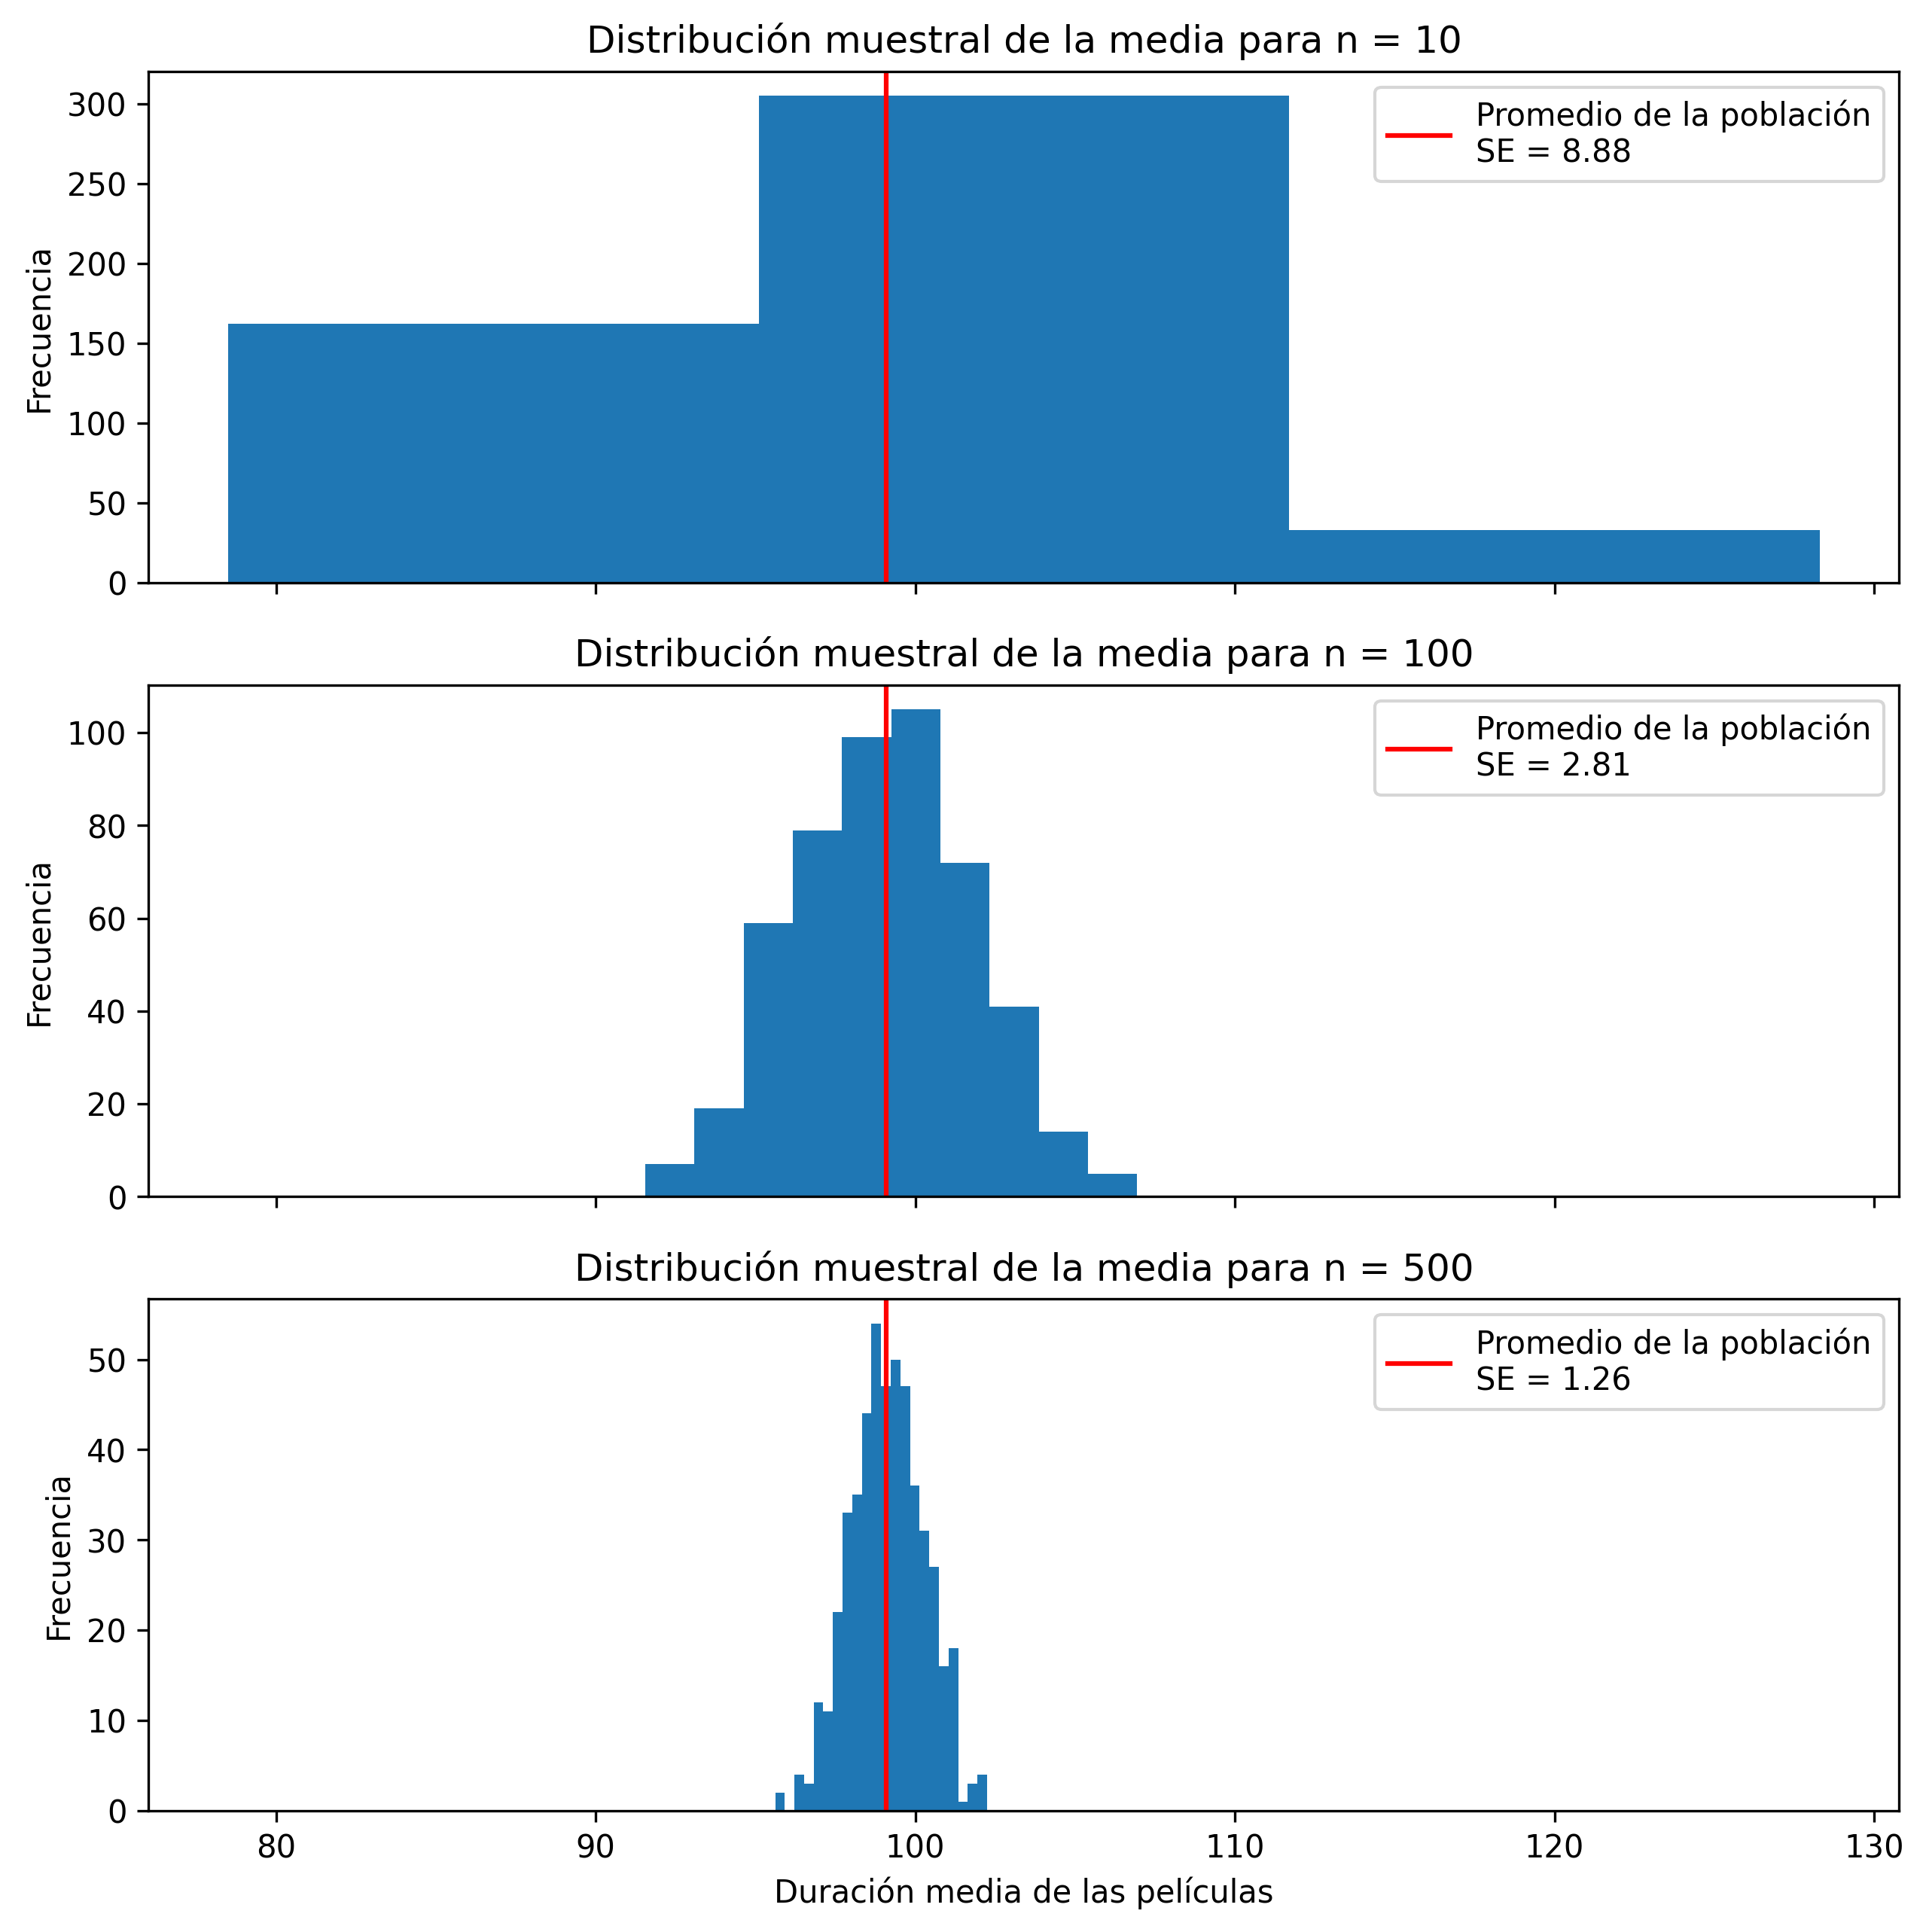

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
netflix_df = read_course_dataset('netflix_titles.csv')
movies = netflix_df[netflix_df['type'] == 'Movie']
duration = movies['duration'].str.replace(' min', '').astype(int)

# generamos el muestreo
dist_10 = []
for i in range(500):
    sample = duration.sample(10)
    dist_10.append(sample.mean())
dist_100 = []
for i in range(500):
    sample = duration.sample(100)
    dist_100.append(sample.mean())
dist_500 = []
for i in range(500):
    sample = duration.sample(500)
    dist_500.append(sample.mean())
### Analizamos

fig, ax = plt.subplots(3, 1, figsize=(10, 10), dpi = 300, sharex = True)

ax[0].hist(dist_10, bins = int(np.sqrt(10)))
se_10 = np.std(duration)/np.sqrt(10)
ax[0].set_title(f'Distribución muestral de la media para n = 10')
ax[0].set_ylabel('Frecuencia')
ax[0].axvline(np.mean(duration), color = 'red', label = f'Promedio de la población\nSE = {se_10:.2f}')
ax[0].legend()

ax[1].hist(dist_100, bins = int(np.sqrt(100)))
se_100 = np.std(duration)/np.sqrt(100)
ax[1].set_title(f'Distribución muestral de la media para n = 100')
ax[1].set_ylabel('Frecuencia')
ax[1].axvline(np.mean(duration), color = 'red', label = f'Promedio de la población\nSE = {se_100:.2f}')
ax[1].legend()

ax[2].hist(dist_500, bins = int(np.sqrt(500)))
se_500 = np.std(duration)/np.sqrt(500)
ax[2].set_title('Distribución muestral de la media para n = 500')
ax[2].set_ylabel('Frecuencia')
ax[2].axvline(np.mean(duration), color = 'red', label = f'Promedio de la población\nSE = {se_500:.2f}')
ax[2].set_xlabel('Duración media de las películas')
ax[2].legend()

plt.show()


4. **Construya los Intervalos de Confianza para el promedio de ratings IMDB al 99% e interprételos.** (Base de datos de oscars)

Recordemos que los intervalos de confianza para el 99% del promedio se pueden calcular como:

$$
\overline{X} \pm Z_{\alpha/2}  \frac{\sigma}{\sqrt{n}}  
$$

Así, debemos calcular $$Z_{\alpha/2}$$ para un $\alpha = 0.0
1$

In [ ]:
oscars_df = read_course_dataset('oscars_df.csv')
ratings = oscars_df['IMDB Rating']
promedio_ratings = np.mean(ratings)
alpha = 0.01
z_alpha2 = st.norm.ppf(1 - alpha/2) # 2.576

se = np.std(ratings)/np.sqrt(len(ratings))

ci_low = np.mean(ratings) - z_alpha2 * se
ci_high = np.mean(ratings) + z_alpha2 * se

print(f'{ci_low} ≤ μ ≤ {ci_high}')
print(f'promedio = {promedio_ratings}')

7.5101279241711305 ≤ μ ≤ 7.630677680032021
promedio = 7.570402802101576


In [ ]:
oscars_df

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,Mank,2020,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",Nominee,2020,131,"Biography,Comedy,Drama",6.9,"65,380",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47d4ae4f-e782-4cd9-9508-4a07302b1c1a
567,567,Minari,2020,Christina Oh,Nominee,2020,115,Drama,7.5,"57,976",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7262b3a8-214d-4205-985c-70e0860f3236
568,568,Promising Young Woman,2020,"Ben Browning, Ashley Fox, Emerald Fennell, and...",Nominee,2020,113,"Crime,Drama,Thriller",7.5,"122,269",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d64c669b-7a73-496a-bddb-19cb09264371
569,569,Sound of Metal,2020,Bert Hamelinck and Sacha Ben Harroche,Nominee,2019,120,"Drama,Music",7.8,"102,807",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647357e9-c067-46bd-aaeb-24d4344ec124


5. **El promedio de rating IMDb es 7. No obstante, luego de su análisis exploratorio de datos, tiene la idea de que las películas galardonadas con Óscar tienen mayor puntaje (al igual que las nominadas).**
    -  **¿Puede apreciar sesgo de los datos observando los boxplot?**
    
    - **Realice un test de hipótesis al respecto de su hipótesis. Recuerde los 5 pasos para la realización de un test de hipótesis para un promedio.**
    
    - **¿Cómo realizaría un test de hipótesis para probar que las películas galardonadas tienen un rating IMDb mayor que las sin galardón?**


- **¿Puede apreciar sesgo de los datos observando los boxplot?**

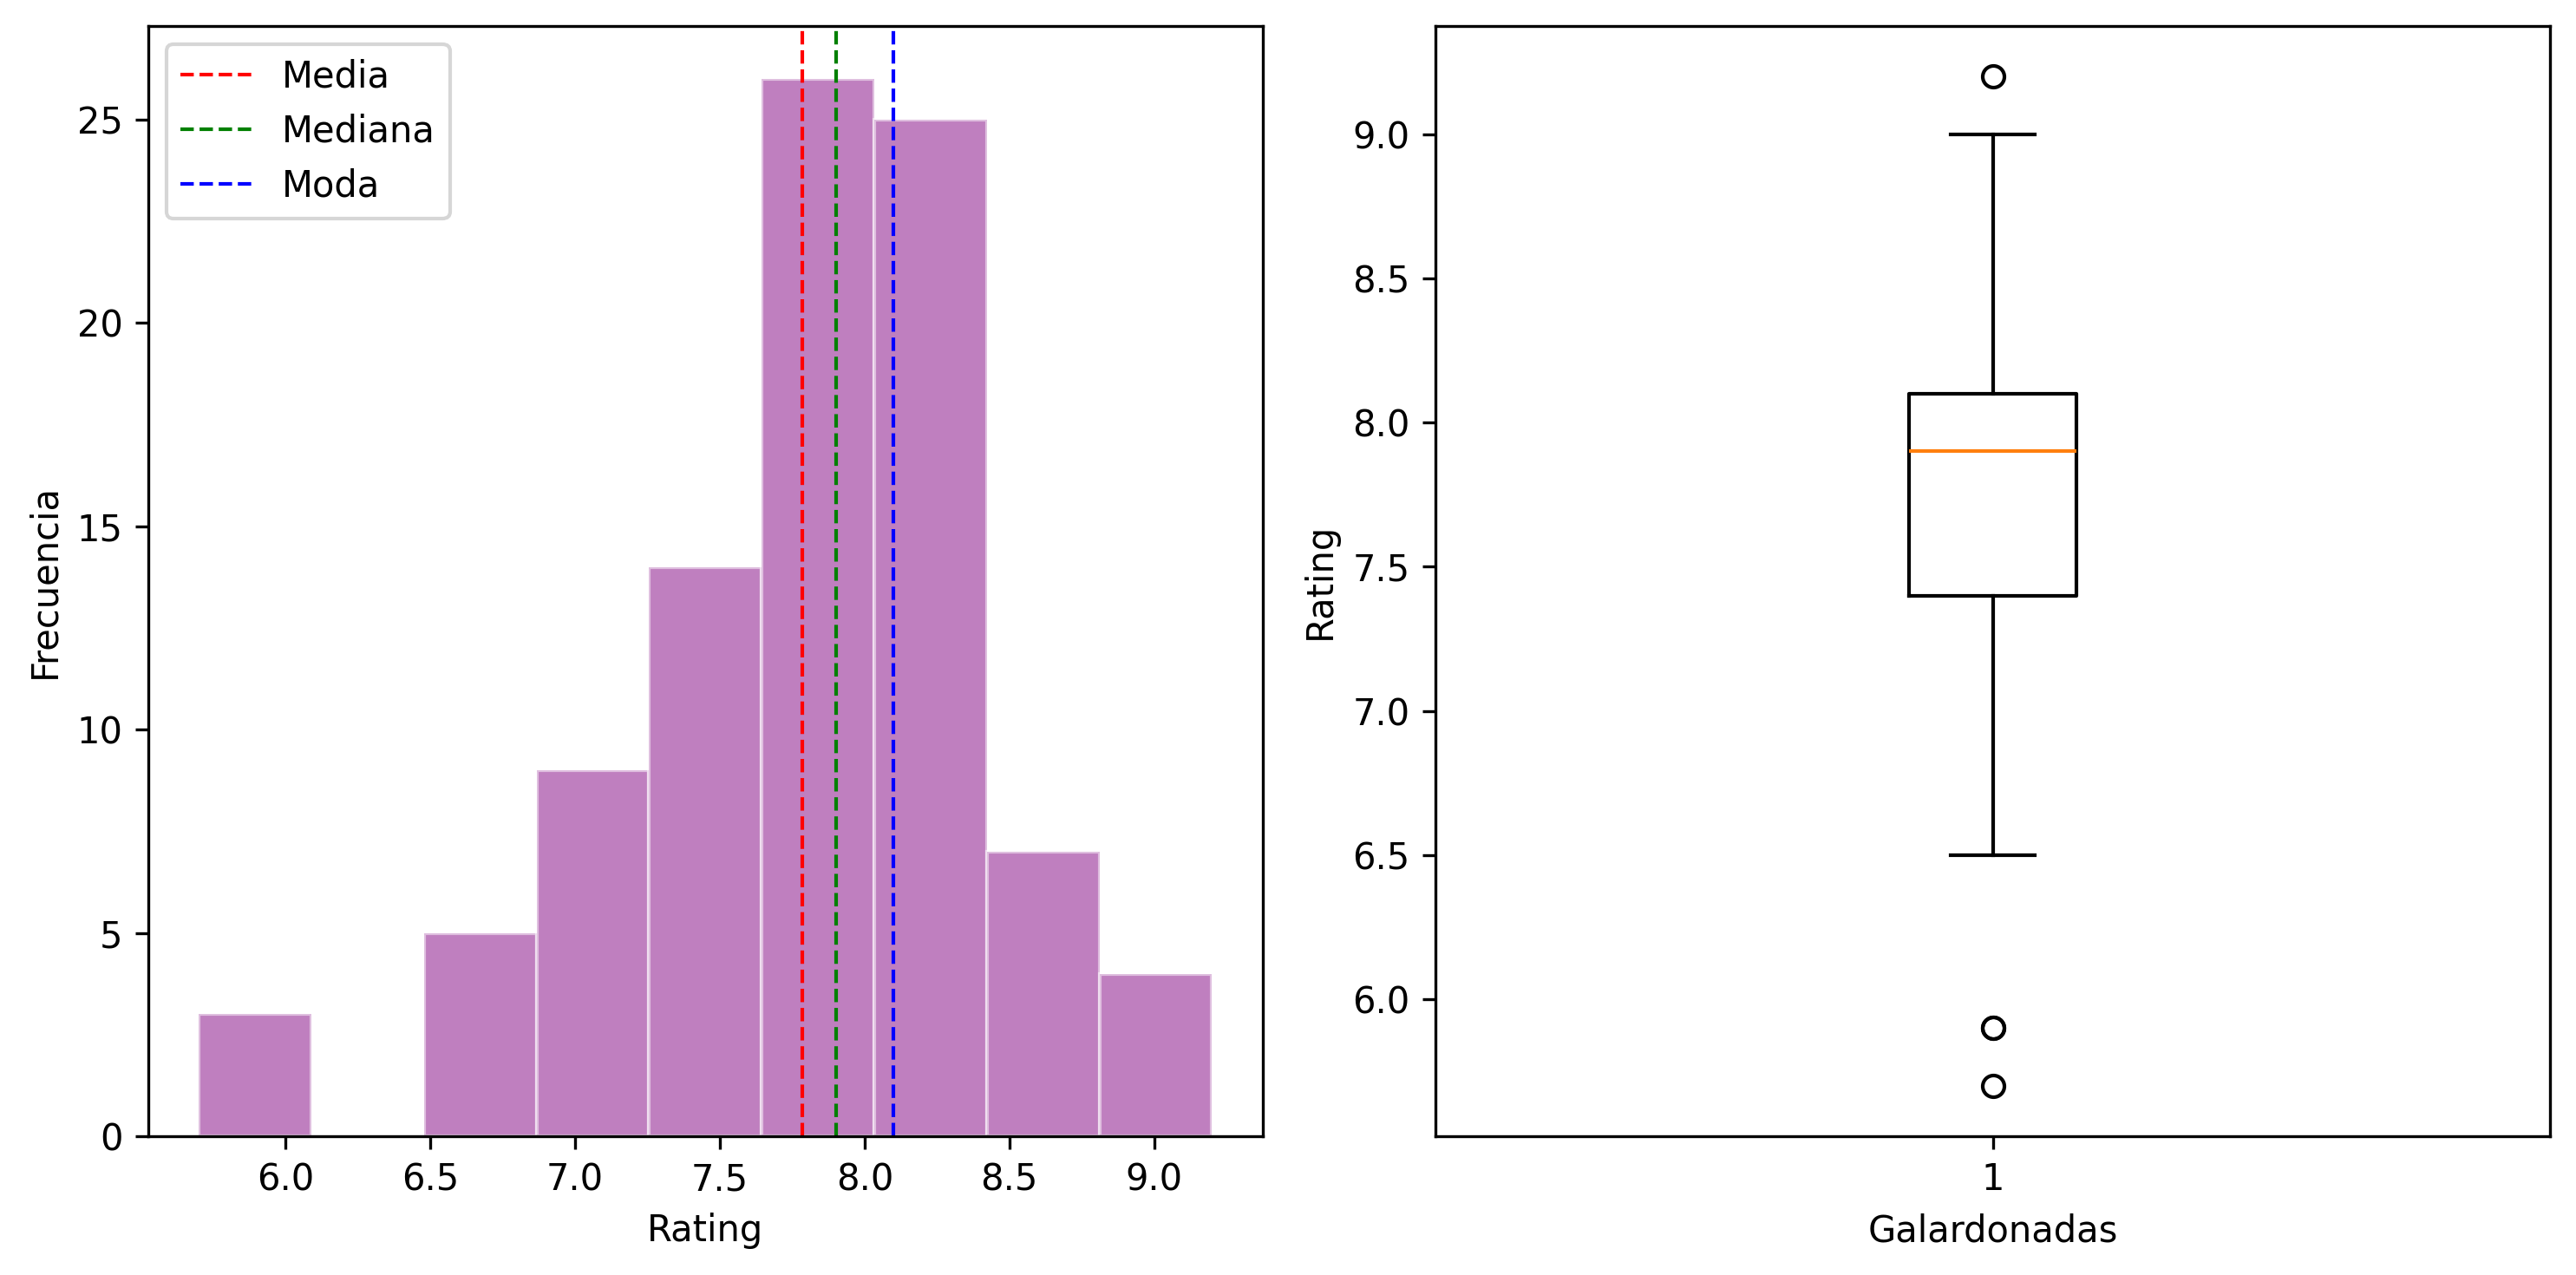

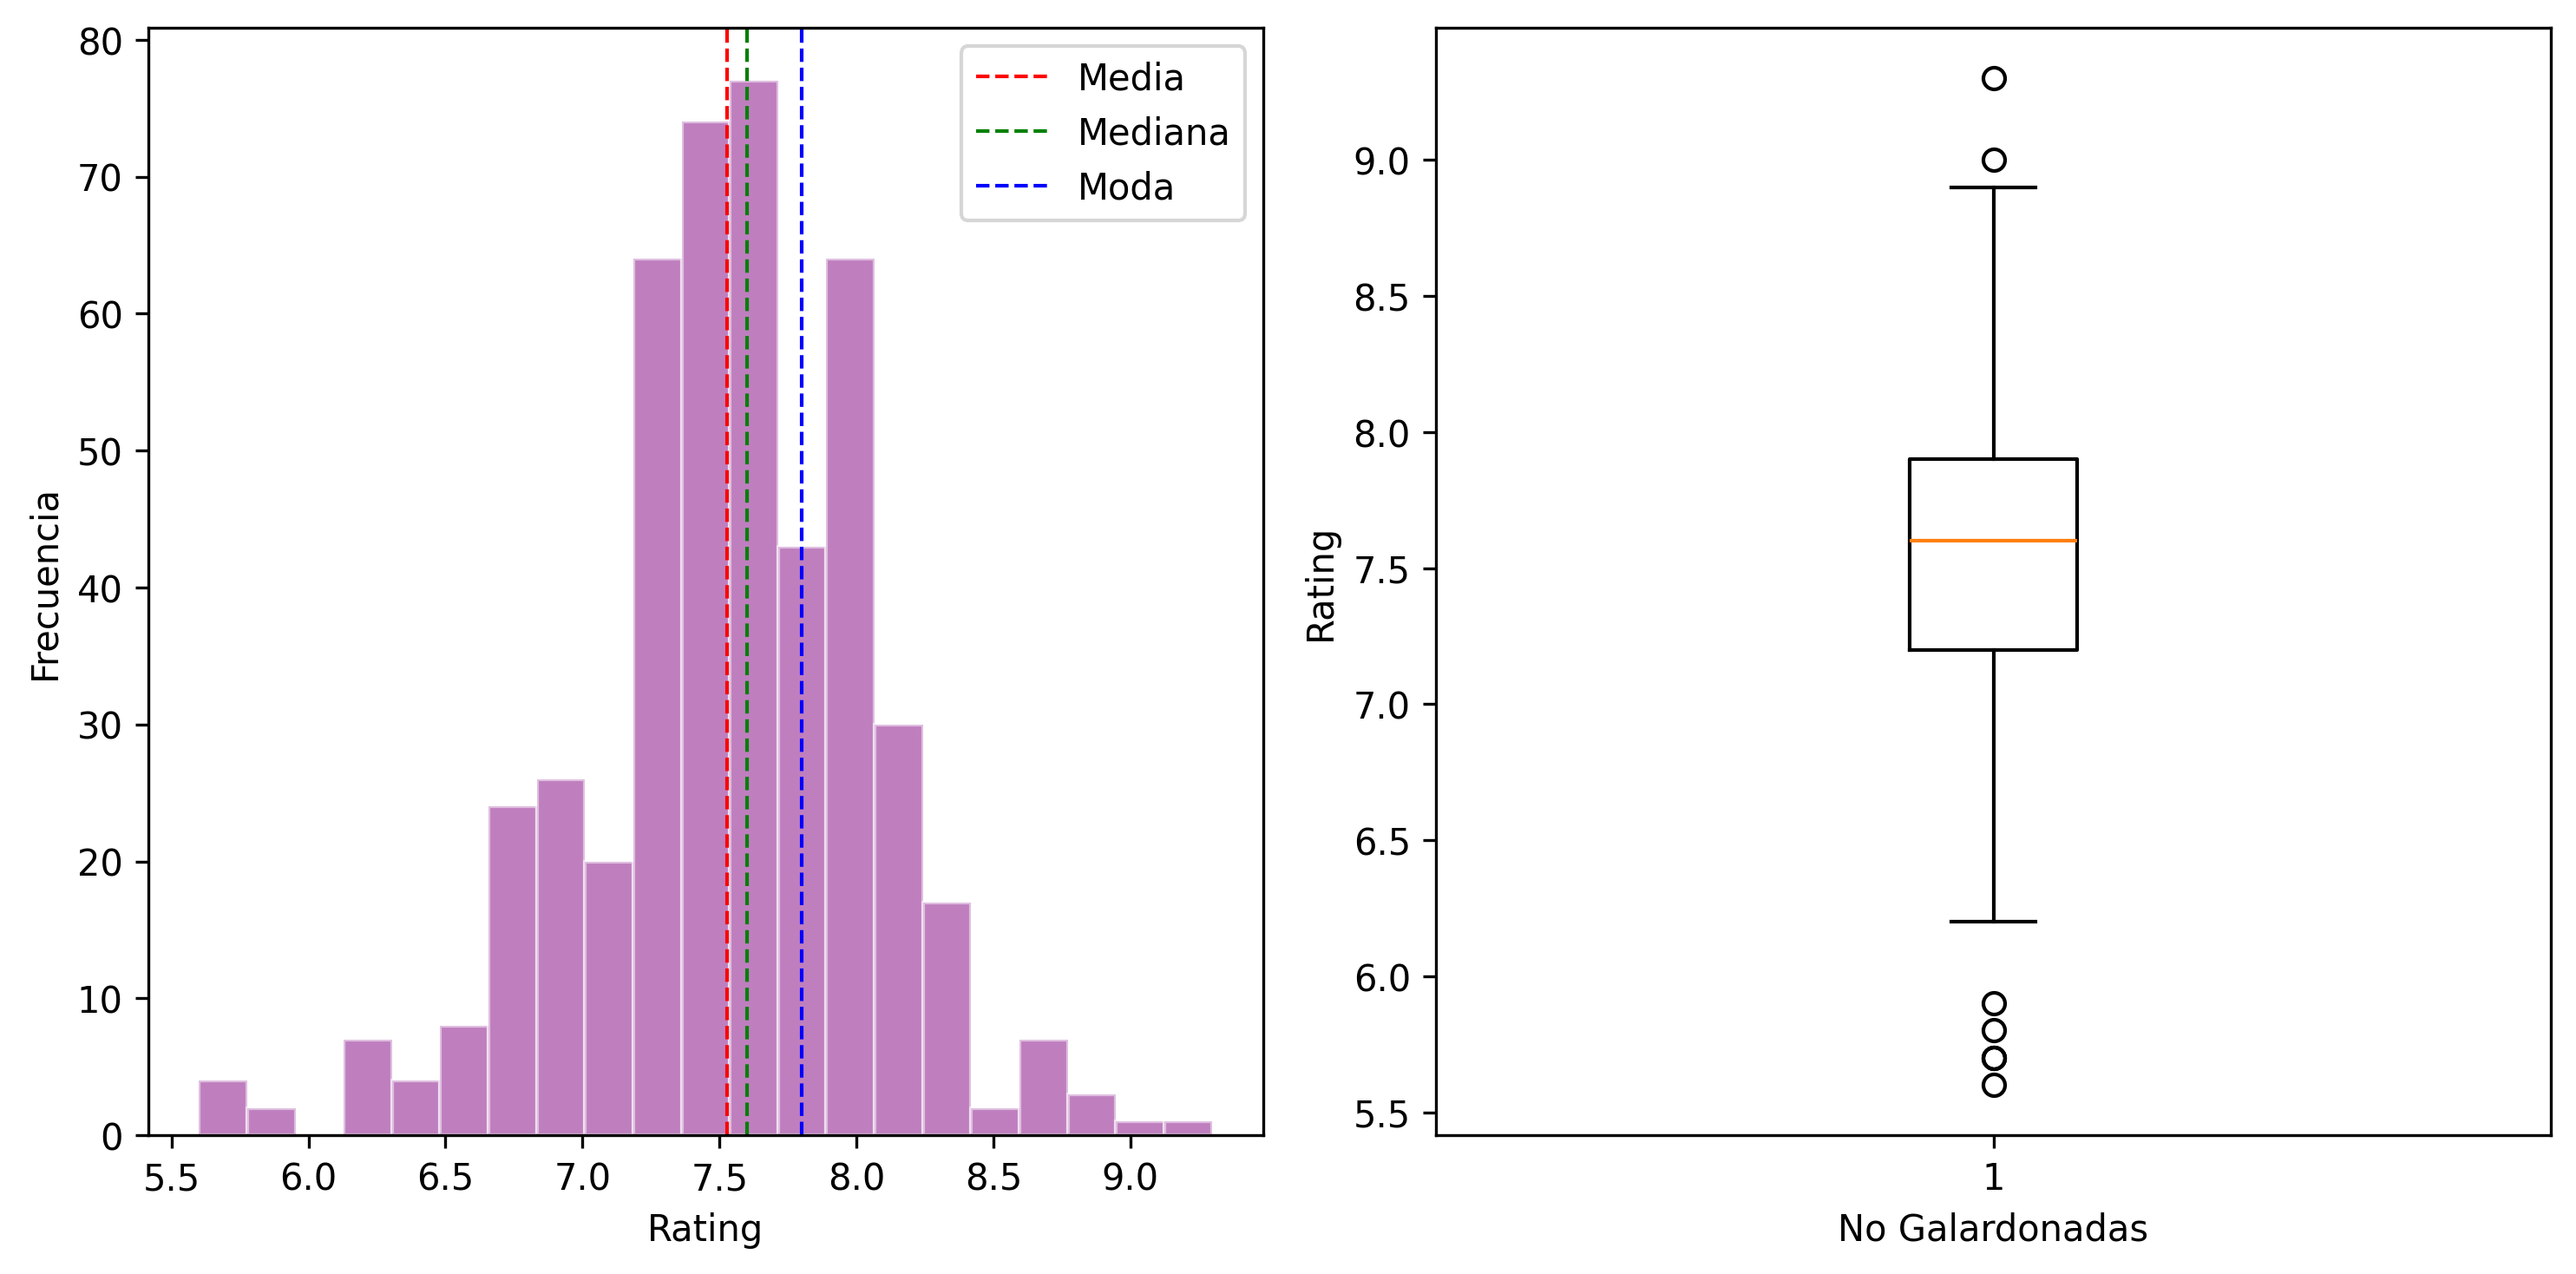

In [ ]:
def histogram_boxplot(data, mean = True, median = True, mode = True,
                    ejex_histogram = None, ejey_histogram = None,
                    ejex_boxplot = None, ejey_boxplot = None, titulo_histograma = None, titulo_boxplot = None,
                    titulo_general = None):
    """
    Función que permite obtener un histograma y un boxplot de los datos
    ---
    Parameters
    data : pd.Series or np.array
        Serie de datos
    mean : bool
        Indica si se quiere mostrar la media
    median : bool
        Indica si se quiere mostrar la mediana
    mode : bool
        Indica si se quiere mostrar la moda
    ejex_histogram : str
        Nombre del eje x del histograma
    ejey_histogram : str
        Nombre del eje y del histograma
    ejex_boxplot : str
        Nombre del eje x del boxplot
    ejey_boxplot : str
        Nombre del eje y del boxplot
    titulo_histograma : str
        Nombre del titulo del histograma
    titulo_boxplot : str
        Nombre del titulo del boxplot
    titulo_general : str
        Nombre del titulo general
    ---
    return: None
    """

        # generamos la figura
    fig, ax = plt.subplots(1, 2, figsize = (10,5), dpi = 300)
    # histograma

    n_bins = np.sqrt(len(data)).astype(int)
    ax[0].hist(data, bins=n_bins, alpha=0.5, color='purple',
               edgecolor = 'white')
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax[0].axvline(data.mean(), color='r', linestyle='dashed', linewidth=1, label = 'Media')
    # mediana
    if median:
        ax[0].axvline(data.median(), color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
    # moda
    if mode:
        ax[0].axvline(data.mode()[0], color='b', linestyle='dashed', linewidth=1, label = 'Moda')
    ax[0].legend()
    # ejes
    if ejex_histogram:
        ax[0].set_xlabel(ejex_histogram)
    if ejey_histogram:
        ax[0].set_ylabel(ejey_histogram)
    # titulo
    if titulo_histograma:
        ax[0].set_title(titulo_histograma)

    ### boxplot ###
    ax[1].boxplot(data)
    if ejex_boxplot:
        ax[1].set_xlabel(ejex_boxplot)
    if ejey_boxplot:
        ax[1].set_ylabel(ejey_boxplot)
    if titulo_boxplot:
        ax[1].set_title(titulo_boxplot)
    if titulo_general:
        fig.suptitle(titulo_general)
    fig.tight_layout()
    plt.show()


galardonadas = oscars_df[oscars_df['Award'] == 'Winner']
no_galardonadas = oscars_df[oscars_df['Award'] == 'Nominee']
rating_galardonadas = galardonadas['IMDB Rating']
rating_no_galardonadas = no_galardonadas['IMDB Rating']

histogram_boxplot(rating_galardonadas,
                  ejex_histogram = 'Rating',
                  ejey_histogram='Frecuencia',
                  ejex_boxplot = 'Galardonadas',
                  ejey_boxplot='Rating')

histogram_boxplot(rating_no_galardonadas,
                  ejex_histogram = 'Rating',
                  ejey_histogram='Frecuencia',
                  ejex_boxplot = 'No Galardonadas',
                  ejey_boxplot='Rating')

- **Realice un test de hipótesis al respecto de su hipótesis. Recuerde los 5 pasos para la realización de un test de hipótesis para un promedio.**

Estimador puntual: 7.78


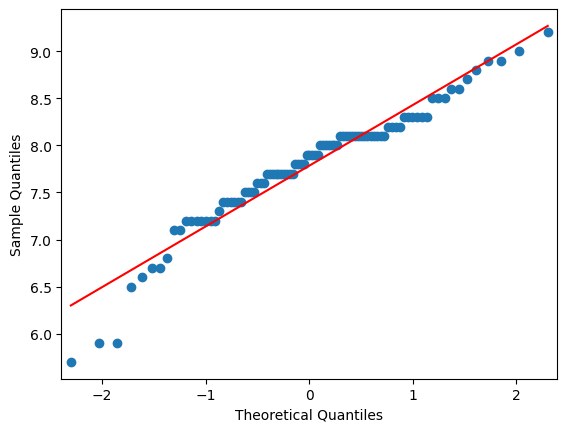

z-score = 11.881
p-value = 0.000e+00


In [ ]:
# obtenemos los datos
import statsmodels.api as sm
galardonadas = oscars_df[oscars_df['Award'] == 'Winner']
rating_galardonadas = galardonadas['IMDB Rating']
# 1. Establecemos la hipótesis
# H0: mu == (mu_0 = 7)
# Ha: mu > (mu_0 = 7)
# 2. Calculamos el estimador puntual
mu_hat = np.mean(rating_galardonadas)
print(f'Estimador puntual: {mu_hat:.2f}')
# 3. Verificamos los supuestos y condiciones
## Independencia
### Debido a que son peliculas diferentes podemos asumir que cada evento es un evento
### independiente de una distribución en particular
## Normalidad
### Al analizar el qqplot podemos ver que ajuste casi bien a la linea de regresión
### al set n > 30 podemos asumir normalidad
sm.qqplot(rating_galardonadas, line = 'r')
plt.show()
# 4. Calculamos la prueba estadística con el correspondiente valor p
# calculamos el z-score
var_rating = np.var(rating_galardonadas)
nbos = rating_galardonadas.shape[0]
z_score = (mu_hat - 7)/(np.sqrt(var_rating/nbos))
# calculamos el p-value para un aprueba de una cola mu > 7
# En este caso el p-value corresponde a 1 - cdf_norm(z_0)
p_value = 1 - st.norm.cdf(z_score)

print(f'z-score = {z_score:.3f}')
print(f'p-value = {p_value:.3e}')




In [ ]:
from statsmodels.stats.weightstats import ztest
# El paso 4 y 5 pueden ser hechos con librerias externas de python
# Por ejemplo el ztest dado  por statsmodels
statistic, pvalue = ztest(rating_galardonadas, value = 7, alternative = 'larger',
                          ddof = 0) # degrees of freedom of 0 as we are comparing populations
print(f'z-score = {statistic:.3f}')
print(f'p-value = {pvalue:.3e}')

z-score = 11.881
p-value = 7.390e-33


- **¿Cómo realizaría un test de hipótesis para probar que las películas galardonadas tienen un rating IMDb mayor que las sin galardón?**

Recordemos que

$$
Z = \frac{\overline{X}_1 - \overline{X}_2 - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1 ^2}{n_1}+ \frac{\sigma_2 ^2}{n_2}}}
$$

Por lo cual, podemos definir un test de hipótesis tal que la diferencia entre promedios sea mayor a 0, en el caso que quedamos $\overline{X}_1 > \overline{X}_2$ o menor a 0 en el caso $\overline{X}_1 < \overline{X}_2 $. Siendo nuestra hipótesis nula que $\overline{X}_1 = \overline{X}_2$. Dado que queremos verificar si son diferentes, $(\mu_1 - \mu_2)=0$.

Estimador puntual 1: 7.78
Estimador puntual 2: 7.53


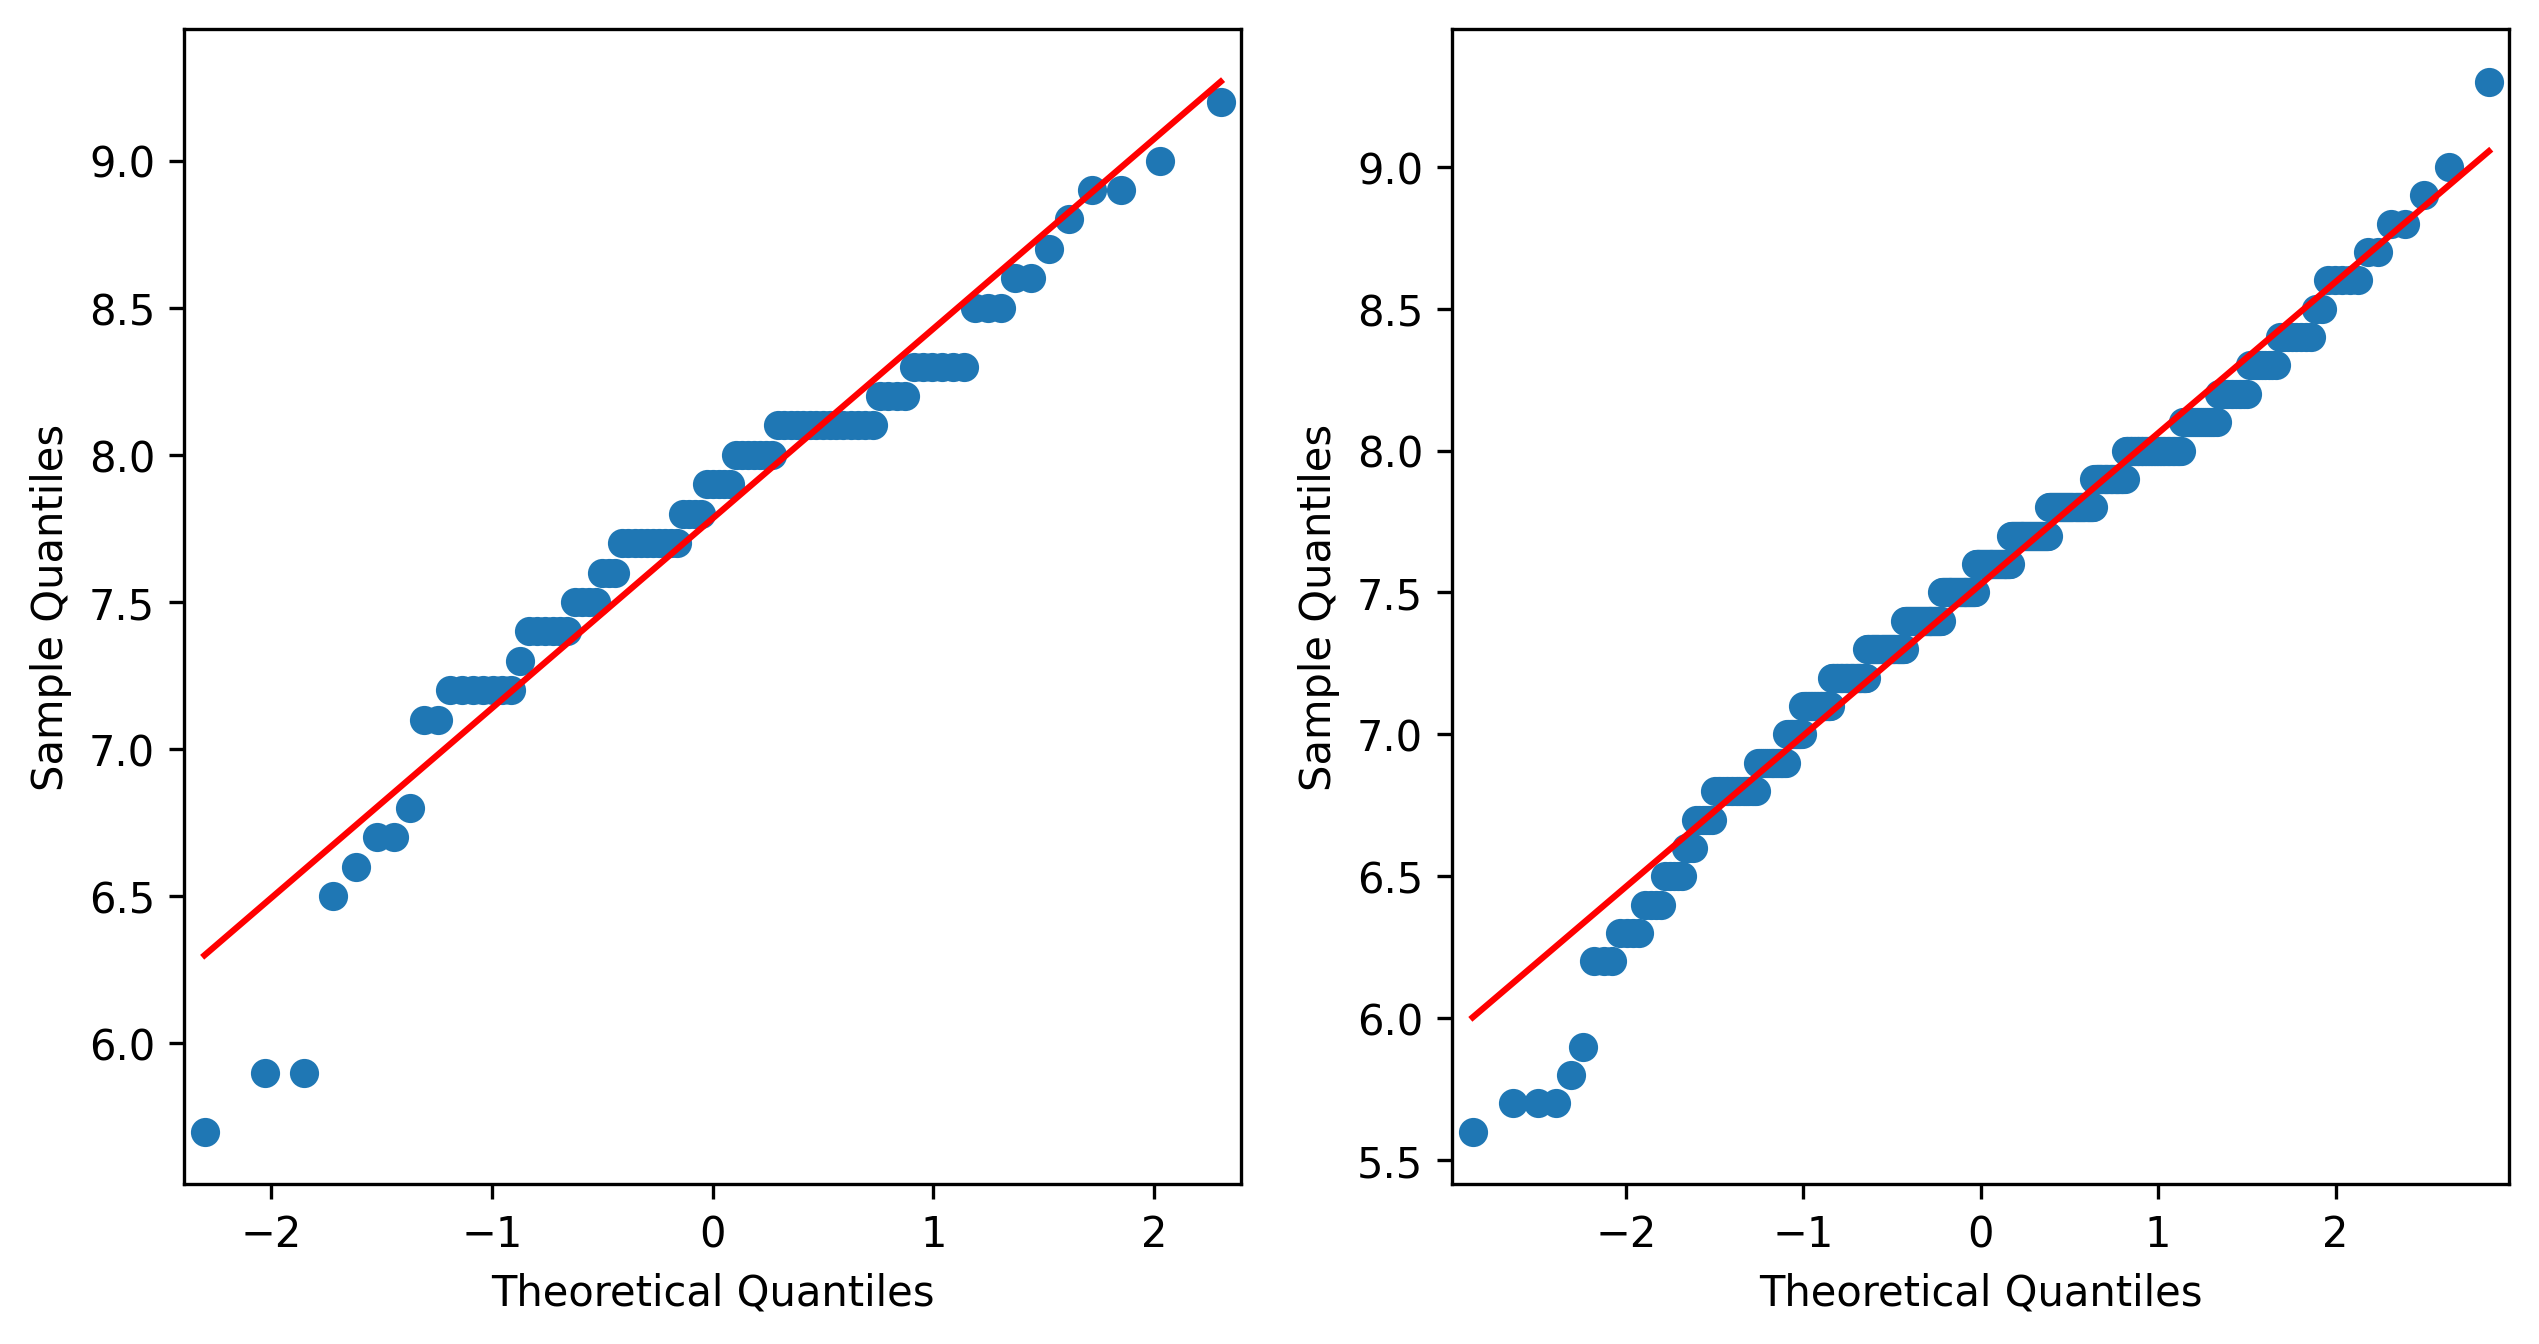

z-score = 3.625
p-value = 1.442e-04


In [ ]:
# Obtenemos los datos
galardonadas = oscars_df[oscars_df['Award'] == 'Winner']
rating_galardonadas = galardonadas['IMDB Rating']
no_galardonadas = oscars_df[oscars_df['Award'] == 'Nominee']
rating_no_galardonadas = no_galardonadas['IMDB Rating']
# 1. Definimos la hipotesis 1 -> ganadora 2 -> nominada
# H_0: (mu_1 - mu_2) == 0
# H_a: (mu_1 - mu_2) > 0
# 2. Calculamos el estimador puntual
mu_hat_1 = np.mean(rating_galardonadas)
mu_hat_2 = np.mean(rating_no_galardonadas)
print(f'Estimador puntual 1: {mu_hat_1:.2f}')
print(f'Estimador puntual 2: {mu_hat_2:.2f}')
# 3. Verificamos los supuestos y condiciones
## Independencia: Se puede asumir gracias a lo anterior
## Normalidad: verificamos normalidad de ambas variables
fig, ax = plt.subplots(1, 2, figsize = (10, 5), dpi = 300)
sm.qqplot(rating_galardonadas, line = 'r', ax = ax[0])
sm.qqplot(rating_no_galardonadas, line = 'r', ax = ax[1])
plt.show()
### Se ven lo suficientemente normales para asumir normalidad, n > 30
# 4. Calculamos el z-score de la prueba
var_1 = np.var(rating_galardonadas)
var_2 = np.var(rating_no_galardonadas)
n_1 = rating_galardonadas.shape[0]
n_2 = rating_no_galardonadas.shape[0]
z_score = (mu_hat_1 - mu_hat_2 - 0)/(np.sqrt(var_1/n_1 + var_2/n_2))
# 5. Calculamos el p-value de la prueba

p_value = 1 - st.norm.cdf(z_score)
print(f'z-score = {z_score:.3f}')
print(f'p-value = {p_value:.3e}')

In [ ]:
### Pasos 4 y 5 con statsmodels
statistic, pvalue = ztest(rating_galardonadas, rating_no_galardonadas, alternative = 'larger',
                          ddof = 0,  # degrees of freedom of 0 as we are comparing populations
                          usevar = 'unequal') # ojo que en este caso utilizamos que las varianzas son no-iguales
print(f'z-score = {statistic:.3f}')
print(f'p-value = {pvalue:.3e}')

z-score = 3.625
p-value = 1.442e-04


# Royal Gala

**Se estudió (Zhang et al, 1995) la distribución de pesos de las manzanas Royal Gala de 15 distintos huertos en Nueva Zelanda. De cada huerto (1 huerto = 1 muestra), se seleccionaron 5 árboles al azar, y de cada árbol se tomaron 20 manzanas de tres secciones distintas de árbol (parte alta, media y baja de la copa), esto para una temporada. Según internet, el peso promedio de una manzana es de 149 g (otras fuentas clasifican a los tamaños como grande, mediano y pequeño, con pesos de 215 g, 169 g y 120 g, respectivamente), y una desviación estándar de 28 g.**

In [ ]:
### Por motivos pedagógicos descarguemos el dataset mediante la importación de datos desde
### google colab
from google.colab import files

def import_and_read_file():
    path = list(files.upload().keys())[0]
    extension = path.split('.')[-1]
    if extension == 'csv':
        return pd.read_csv(path)
    else:
        return pd.read_excel(path)
gala_df = import_and_read_file()

Saving gala.xlsx to gala.xlsx


1.  **¿Qué tipo de muestreo fue realizado (para cada muestra)?**

Notar que para cada muestra, se seleccionan diferentes grupos dentro de esta población con tal de obtener una muestra representativa. Al haber una división de la población se está realizando un **muestreo estratificado**.

**2. Uno de los dueños de uno de los huertos, el Viejo MacDonald, asegura que sus manzanas son de las grandes; en promedio, la muestra de su huerto arrojó un promedio de 210 g y una desviación estándar de 42 g (asuma que el peso de las manzanas siguen una distribución normal).**

**a. ¿Cuál es la probabilidad de que, al sacar una manzana al azar del huerto del Viejo MacDonald, la manzana sea de tamaño medio, o más pequeña?**

Notar que sabemos que las manzanas del huerto del Viejo MacDonald poseen una distribución normal, con media 210 g y desviación estándard 42 g.
Además, sabemos que las manzanas de tamaño mediano pesan 169 g. Así, la probabilidad de que el peso sea menor o igual a este valor viene dado por:

$$
P(x \leq 169) = \Phi\left(\frac{169 - 210}{42}\right)
$$

In [ ]:
###
st.norm.cdf((169 - 210)/42) # estandarizando la variable hacia una normal 0, 1

prob = st.norm.cdf(169,
            loc = 210, # media
            scale = 42) # desviacion estándard
print(f'La probabilidad pedida es {prob}')

La probabilidad pedida es 0.16448504095374533


**b. ¿Y la probabilidad de encontrar una manzana que sea justo de 210 g?**

In [ ]:
# en este caso utilizamos la probabilidad puntual
prob2 = st.norm.pdf(210,
            loc = 210,
            scale = 42)
print(f'La probabilidad pedida es {prob2}')

La probabilidad pedida es 0.009498625723843636


**c. ¿Cuál es la probabilidad de que al tomar una manzana, esta pese entre 127.68 y 292.32
g?**

En este caso, hacemos uso de que
$$
P(a<x<b) = P(x<b)-P(x\leq a)
$$
- ¿Piense porqué es así?

Por lo cual, la probabilidad de que este entre esos valores viene dada por:
$$
P(127.68<x\leq 292.32) = P(x\leq 292.32)-P(x\leq 127.68)
$$


In [ ]:
# Probabilidad P < 127.68
prob_menor = st.norm.cdf(127.68,
            loc = 210,
            scale = 42)
prob_mayor = st.norm.cdf(292.32,
            loc = 210,
            scale = 42)
print(f'La probabilidad pedida es {prob_mayor - prob_menor}')

La probabilidad pedida es 0.950004209703559


**d. ¿Qué rango de pesos de manzanas de la huerta del Viejo MacDonald contiene el 99% de los datos de peso obtenidos para esta muestra?**

En este caso, queremos obtener los valores $Z_{\alpha/2}$ y $Z_{-\alpha/2}$. Con $\alpha$ siendo $\alpha = 1 - 0.99 = 0.01$.

In [ ]:
rango_superior = st.norm.ppf(1 - 0.01/2,
                             loc = 210,
                             scale = 42)
rango_inferior = st.norm.ppf(0.01/2,
                             loc = 210,
                             scale = 42)
print(f'Rango superior: {rango_superior}')
print(f'Rango inferior: {rango_inferior}')

Rango superior: 318.18483074905384
Rango inferior: 101.81516925094617


Proporcion de datos en el rango: 0.9902


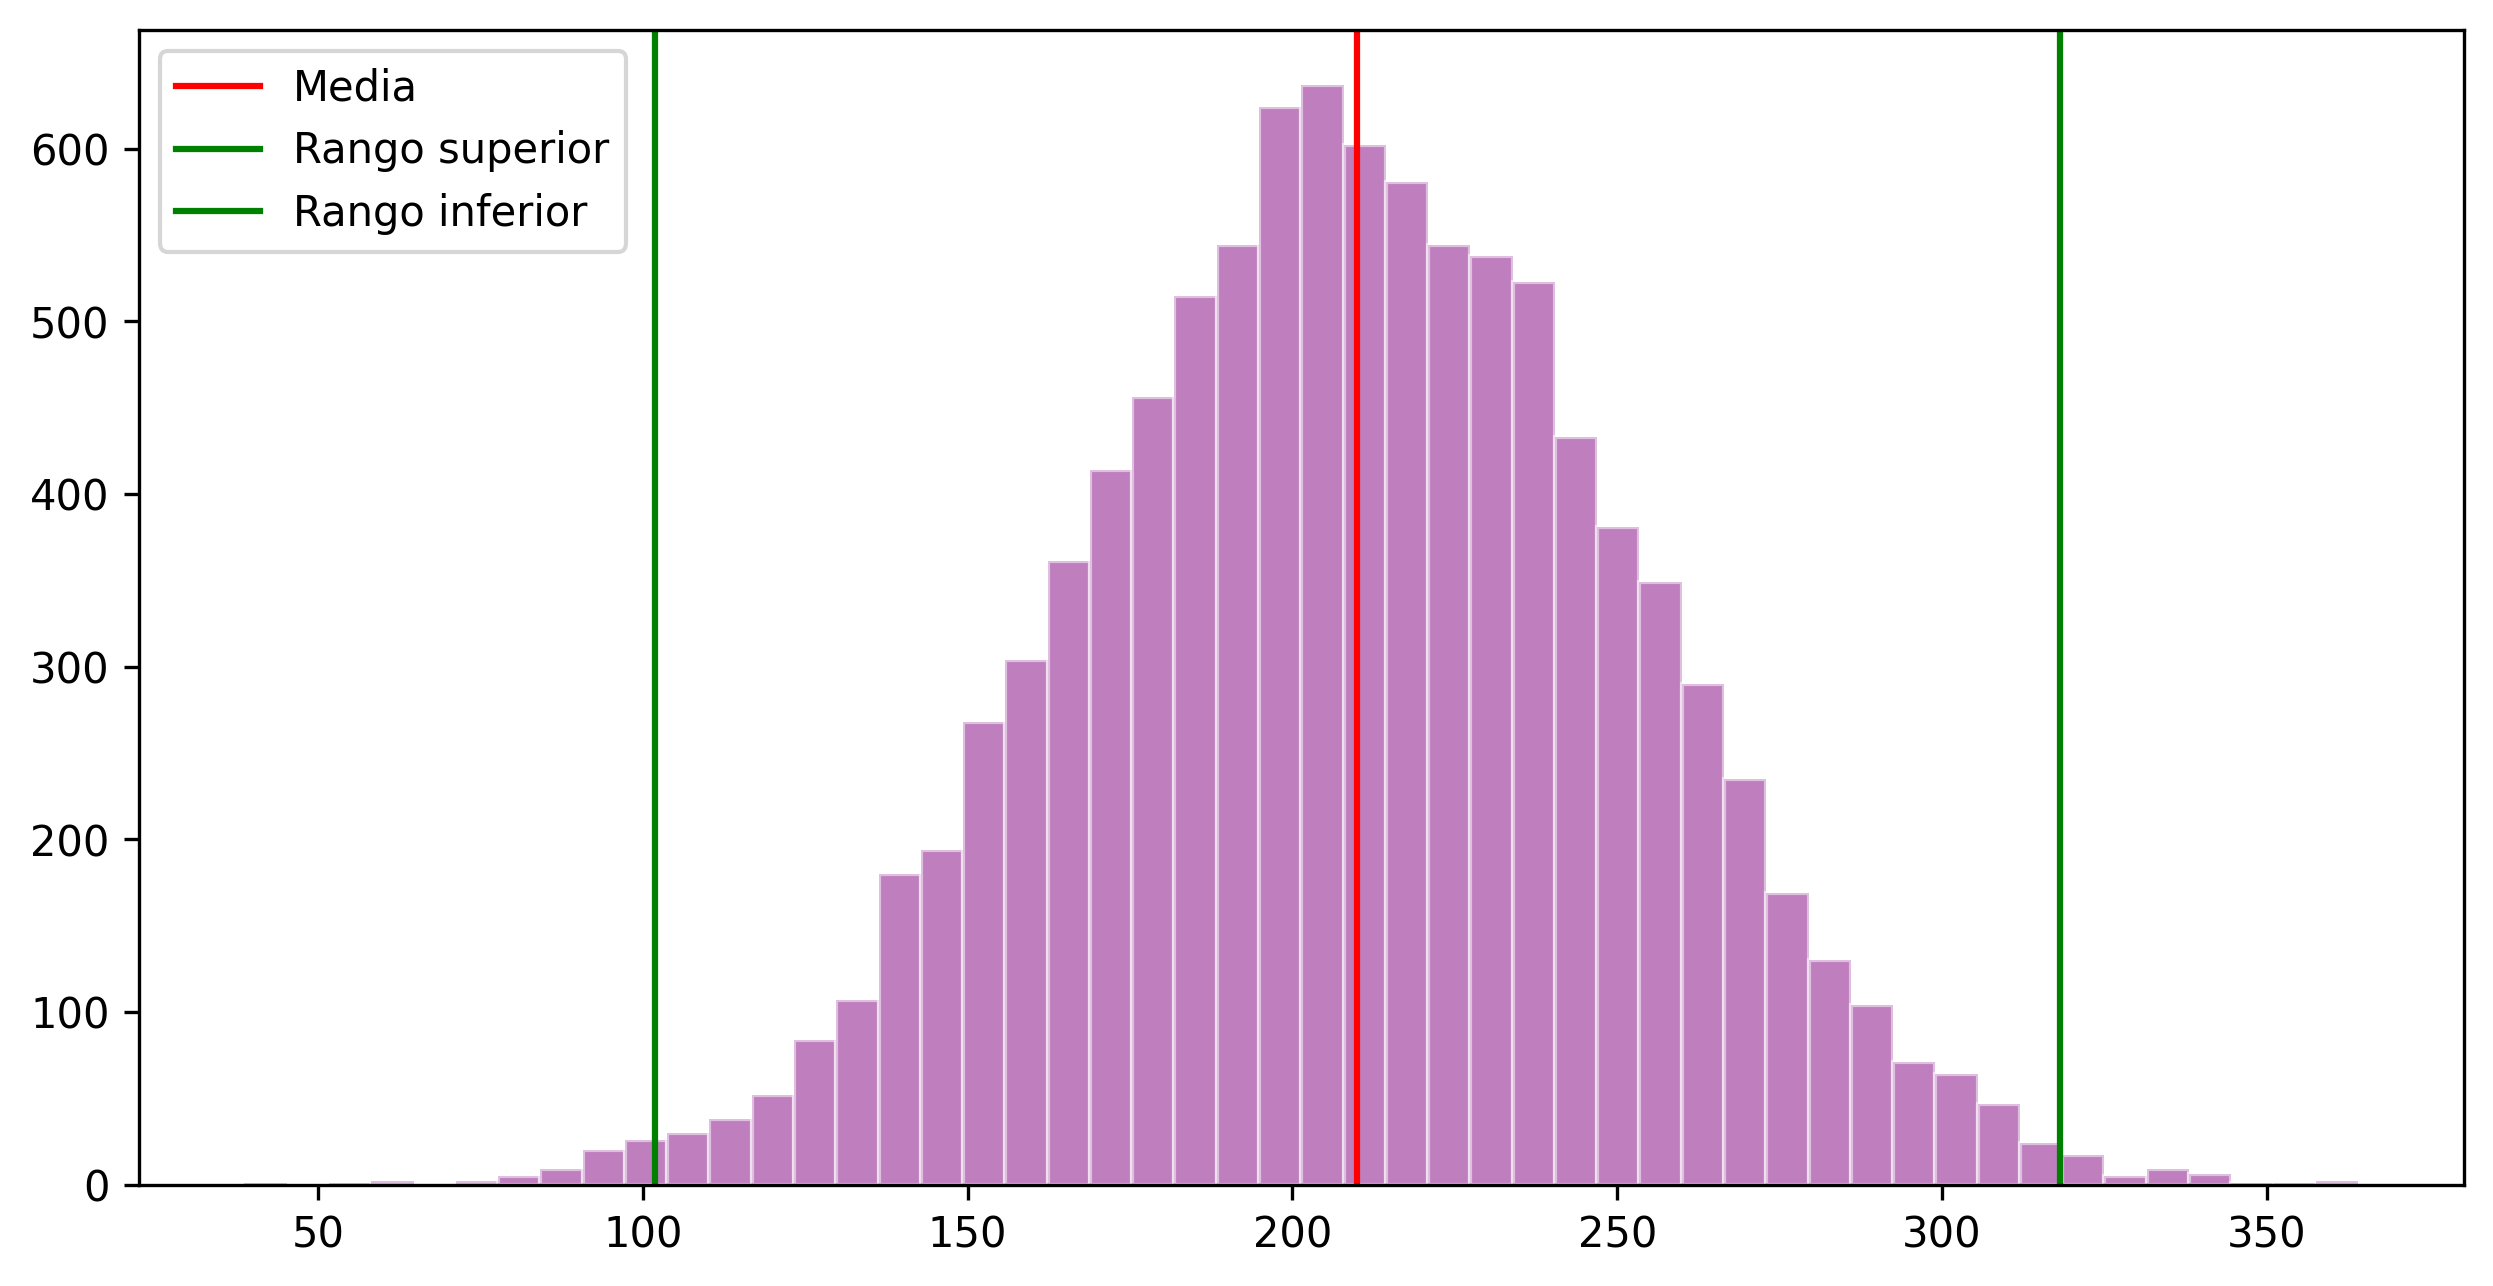

In [ ]:
### Visualizemoslo

fig, ax = plt.subplots(1, 1, figsize = (10, 5), dpi = 300)
norm_data = np.random.normal(loc = 210, scale = 42, size = 10000)
ax.hist(norm_data, bins = 50, alpha = 0.5, color = 'purple', edgecolor = 'white')
ax.axvline(210, color = 'red', label = 'Media')
ax.axvline(rango_superior, color = 'green', label = 'Rango superior')
ax.axvline(rango_inferior, color = 'green', label = 'Rango inferior')
ax.legend()
data_in_range = (norm_data < rango_superior) & (rango_inferior < norm_data)
proportion = np.mean(data_in_range.astype(int))
print(f'Proporcion de datos en el rango: {proportion}')
plt.show()

**e. Si quisiera estimar el promedio de pesos de manzana usando como referencia la muestra del Viejo MacDonald, ¿por qué esto sería una mala idea estadística?**

Sabemos que los datos están sesgados hacia un valor mayor al del promedio de la población. Por lo cual es una mala idea. Sumado a que estamos limitando la muestra hacia un lugar, lo cual sesga aún más los datos.

**3.  El Viejo MacDonald quiere saber si su técnica para fertilizar los manzanos está en efecto entregando manzanas más grandes que el promedio de 149 g. Plantee la correcta hipótesis y ejecute el test de hipótesis para corroborarla. Recuerde que del huerto del Viejo MacDonald se obtuvieron 20 manzanas**



z-score = 9.743
p-value = 0.000e+00


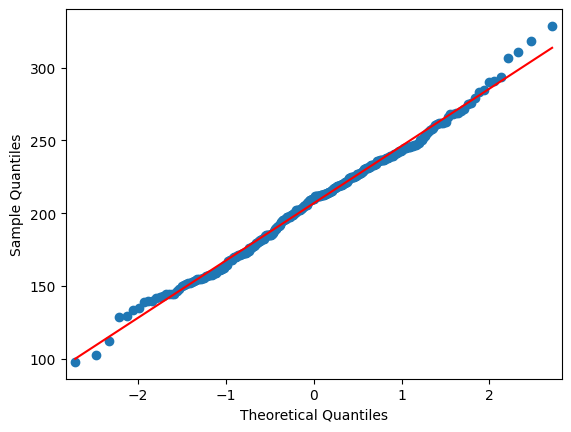

In [ ]:
## Hipótesis
# H_0: mu = 149
# H_a: mu > 149
##

alpha = 0.05 # significancia

## Calculamos el estimador

gala_avg = 149
gala_viejito = 210
n = 20
se = 28 / np.sqrt(n) # n tamaño de la muestra

## Verificamos normalidad de los datos

sm.qqplot(gala_df['weight'], line = 'r')

## Calculamos la prueba estadística

z_score = (gala_viejito - gala_avg)/se
p_value = 1 - st.norm.cdf(z_score)
print(f'z-score = {z_score:.3f}')
print(f'p-value = {p_value:.3e}')
plt.show()

**4. Un vecino del Viejo MacDonald, con un promedio de manzanas de su huerto de 150 g, también asegura que sus manzanas son más grandes que el promedio. Recuerde que de este huerto se obtuviron 20 manzanas. Asumiendo que el vecino tiene razón:**

**a. ¿Cuál es la probabilidad de catalogar erróneamente a las manzanas del vecino como "del promedio". ¿Qué tipo de error es este?**

Antes que todo, debemos definir la hipótesis

$H_0: \mu_v = \mu_0$

$H_a: \mu_v > \mu_0$

Donde $\mu_v$ es el promedio del vecino y $\mu_0$ es el promedio de las manzanas.

Entonces, catalogar erróneamente las manzanas como "del promedio" implica que estamos aceptando la hipótesis nula cuando la hipótesis alternativa era la verdadera. Este es un error del tipo 2.

La probabilidad de que ocurra este tipo de errores viene dado por
$$
 \beta = P(\text{Aceptar } H_0| H_a \text{ verdadera})
$$

**b. ¿Cuál es la probabilidad de catalogar erróneamente a las manzanas del vecino como "más grandes que el promedio"? ¿Qué tipo de error es este?**

Al igual que antes, en este caso estamos aceptando erroneamente la hipótesis alternativa. Es decir, aceptamos $H_a$ dado que $H_0$ es verdad. De esta forma, este es un error del tipo I.
La probabilidad de que ocurra este tipo de errores viene dado por
$$
 \alpha = P(\text{Aceptar } H_a| H_0 \text{ verdadera})
$$

---

El cálculo de este tipo de probabilidades lo veremos la próxima semana.


**c. Calcule el valor z crítico para rechazar la hipótesis de que las manzanas del vecino son "del promedio", y el valor z para el promedio de las manzanas de vecino. ¿Hay evidencia para decir que son más grandes que el promedio?**

Dado que comprobamos los supuestos del test-z previamente. Simplemente calculamos


$H_0: \mu_v = \mu_0$

$H_a: \mu_v \neq \mu_0$


In [ ]:
mu_vecino = 150
se = 28 / np.sqrt(20)
z_score = (mu_vecino - gala_avg)/se
print(f'z-score = {z_score:.3f}')
p_value = 2 * (1 - st.norm.cdf(abs(z_score)))
print(f'p-value = {p_value:.3f}')

z-score = 0.160
p-value = 0.873


Por lo cual no existe suficiente evidencia para decir que los las manzanas del vecino son mayores a la media poblacional

**5. Los demás dueños de manzanas quieren saber también si sus manzanas son distintas del promedio conocido. No obstante, tuvo que realizar un nuevo muestreo en una siguiente temporada de 8 huertos, esta vez tomando aleatoriamente 30 manzanas de cada uno (muestre sus resultados en una tabla, incluya z-critico, valor-p y si se acepta o rechaza la hipotesis nula con significancia del 0.05). Debido a una catástrofe ecológica, la desviación estándar de manzanas Gala ya no es conocida. Realice de manera iterative un test de hipótesis para los demás huertos. Para esto posee los siguientes datos en donde la primera entrada es la media de las manzanas del huerto y la segunda su desviación estándard.**

Definimos la hipótesis

$H_0: \mu_h = \mu_0$

$H_a: \mu_h \neq \mu_0$

Donde $\mu_h$ es la media del huerto.

In [ ]:
gala_matrix = [110,55, 120, 125, 130, 140, 140, 150]

n = 30
huertos_df = pd.DataFrame(columns = ['Huerto', 'z-score', 'p-value', 'Rechazamos H0'])

for huerto in gala_matrix: # evaluamos por cada huerto
    media_huerto = huerto
    se = 28 / np.sqrt(n)
    z_score = (media_huerto - gala_avg)/se

    p_value = 2 * (1 - st.norm.cdf(abs(z_score)))
    huertos_df.loc[len(huertos_df)] = [media_huerto, z_score, p_value, p_value < alpha]
huertos_df.style.format(precision = 5)

,Huerto,z-score,p-value,Rechazamos H0
0,110,-7.62899,0.00000,True
1,55,-18.38783,0.00000,True
2,120,-5.67284,0.00000,True
3,125,-4.69476,0.00000,True
4,130,-3.71669,0.00020,True
5,140,-1.76054,0.07832,False
6,140,-1.76054,0.07832,False
7,150,0.19562,0.84491,False
